***1. Load and Inspect the Data:***
Load both datasets into Pandas DataFrames

In [69]:
import pandas as pd
deliveries=pd.read_csv('/content/deliveries.csv')
matches=pd.read_csv('/content/matches (1).csv')

Combine data where necessary (hint: match IDs are common across both datasets)


In [70]:
combined_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id', how='inner')

Perform an initial inspection using head(), info(), and describe() to
understand column types and values.

In [71]:
combined_data.head()
combined_data.info()
combined_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93057 entries, 0 to 93056
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          93057 non-null  int64  
 1   inning            93057 non-null  int64  
 2   batting_team      93057 non-null  object 
 3   bowling_team      93056 non-null  object 
 4   over              93056 non-null  float64
 5   ball              93056 non-null  float64
 6   batsman           93056 non-null  object 
 7   non_striker       93056 non-null  object 
 8   bowler            93056 non-null  object 
 9   is_super_over     93056 non-null  float64
 10  wide_runs         93056 non-null  float64
 11  bye_runs          93056 non-null  float64
 12  legbye_runs       93056 non-null  float64
 13  noball_runs       93056 non-null  float64
 14  penalty_runs      93056 non-null  float64
 15  batsman_runs      93056 non-null  float64
 16  extra_runs        93056 non-null  float6

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,93057.000000,93057.000000,93056.000000,93056.000000,93056.000000,93056.000000,93056.000000,93056.000000,93056.000000,93056.000000,93056.000000,93056.000000,93056.000000,93057.000000,93057.000000,93057.000000,93057.000000,93057.000000
mean,197.532996,1.481844,10.126580,3.619810,0.000494,0.038547,0.005384,0.022739,0.004664,0.000054,1.206671,0.071387,1.278058,197.532996,2011.262269,0.016237,13.861074,3.293895
std,113.371454,0.501605,5.670758,1.810329,0.022228,0.261940,0.118391,0.201970,0.075182,0.016391,1.582870,0.355386,1.572035,113.371454,2.766117,0.126388,23.038747,3.446379
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,100.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,2009.000000,0.000000,0.000000,0.000000
50%,197.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,197.000000,2011.000000,0.000000,0.000000,3.000000
75%,296.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,296.000000,2012.000000,0.000000,21.000000,6.000000
max,393.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,5.000000,7.000000,393.000000,2017.000000,1.000000,146.000000,10.000000


**2. Data Cleaning and Preprocessing:**
○ Identify and handle missing values appropriately in both datasets.

In [72]:
combined_data['win_by_runs'].fillna(combined_data['win_by_runs'].mean(), inplace=True)

combined_data['city'].fillna(combined_data['city'].mode()[0], inplace=True)

combined_data['player_dismissed'].fillna('Not Out', inplace=True)

for col in ['umpire1', 'umpire2', 'umpire3']:
    combined_data[col].fillna('Unknown', inplace=True)

combined_data.dropna(inplace=True)


<ipython-input-72-6d0e342c006c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['win_by_runs'].fillna(combined_data['win_by_runs'].mean(), inplace=True)
<ipython-input-72-6d0e342c006c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

○ Standardize team names and venue names for consistency

In [73]:
team_names = combined_data['team1'].unique()
print(team_names)

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors']


In [74]:
team_name_mapping = {
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Delhi Daredevils': 'Delhi Capitals',
}
combined_data['team1'] = combined_data['team1'].replace(team_name_mapping)
combined_data['team2'] = combined_data['team2'].replace(team_name_mapping)
combined_data['winner'] = combined_data['winner'].replace(team_name_mapping)
combined_data['toss_winner'] = combined_data['toss_winner'].replace(team_name_mapping)

In [75]:
venue_names = combined_data['venue'].unique()
print(venue_names)

['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo Park' 'New Wanderers Stadium'
 'De Beers Diamond Oval' 'OUTsurance Oval' 'Brabourne Stadium'
 'Sardar Patel Stadium, Motera' 'Barabati Stadium'
 'Vidarbha Cricket Association Stadium, Jamtha'
 'Himachal Pradesh Cricket Association Stadium' 'Nehru Stadium'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Subrata Roy Sahara Stadium']


In [76]:
venue_name_mapping = {
    'M Chinnaswamy Stadium': 'M.Chinnaswamy Stadium',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association Stadium',
}
combined_data['venue'] = combined_data['venue'].replace(venue_name_mapping)

○ Ensure all numerical columns are in the correct data type.

In [77]:
numerical_cols = combined_data.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'id', 'season',
       'dl_applied', 'win_by_runs', 'win_by_wickets'],
      dtype='object')


In [78]:
if combined_data['win_by_runs'].dtype != 'int64':
    combined_data['win_by_runs'] = combined_data['win_by_runs'].astype('int64')

if combined_data['over'].dtype != 'int64':
    combined_data['over'] = combined_data['over'].astype('int64')

if combined_data['ball'].dtype != 'int64':
    combined_data['ball'] = combined_data['ball'].astype('int64')

if combined_data['is_super_over'].dtype != 'int64':
    combined_data['is_super_over'] = combined_data['ball'].astype('int64')

if combined_data['wide_runs'].dtype != 'int64':
    combined_data['wide_runs'] = combined_data['ball'].astype('int64')

if combined_data['bye_runs'].dtype != 'int64':
    combined_data['bye_runs'] = combined_data['ball'].astype('int64')

if combined_data['legbye_runs'].dtype != 'int64':
    combined_data['legbye_runs'] = combined_data['ball'].astype('int64')

if combined_data['noball_runs'].dtype != 'int64':
    combined_data['noball_runs'] = combined_data['ball'].astype('int64')

if combined_data['penalty_runs'].dtype != 'int64':
    combined_data['penalty_runs'] = combined_data['ball'].astype('int64')

if combined_data['batsman_runs'].dtype != 'int64':
    combined_data['batsman_runs'] = combined_data['ball'].astype('int64')

if combined_data['extra_runs'].dtype != 'int64':
    combined_data['extra_runs'] = combined_data['ball'].astype('int64')

if combined_data['total_runs'].dtype != 'int64':
    combined_data['total_runs'] = combined_data['ball'].astype('int64')

if combined_data['id'].dtype != 'int64':
    combined_data['id'] = combined_data['ball'].astype('int64')

if combined_data['season'].dtype != 'int64':
    combined_data['season'] = combined_data['ball'].astype('int64')

if combined_data['dl_applied'].dtype != 'int64':
    combined_data['dl_applied'] = combined_data['ball'].astype('int64')

if combined_data['win_by_runs'].dtype != 'int64':
    combined_data['win_by_runs'] = combined_data['ball'].astype('int64')

if combined_data['win_by_wickets'].dtype != 'int64':
    combined_data['win_by_wickets'] = combined_data['ball'].astype('int64')

○ Merge Matches.csv and Deliveries.csv based on match_id to perform
advanced analyses.


In [79]:
combined_data = pd.merge(deliveries, matches, left_on='match_id', right_on='id', how='inner')

**Exploratory  Data Analysis (EDA)**


Match-Level Analysis (Using Matches.csv):
1. Team Performance**

Q1: Find the win percentage of each team over all seasons. (Use total
matches played vs. total matches won).


In [80]:
team_wins = matches.groupby('winner')['id'].count().reset_index()
team_wins.rename(columns={'id': 'wins', 'winner': 'team'}, inplace=True)

total_matches = pd.concat([matches['team1'], matches['team2']]).value_counts().reset_index()
total_matches.columns = ['team', 'total_matches']

win_percentage = pd.merge(team_wins, total_matches, on='team', how='inner')

win_percentage['win_percentage'] = (win_percentage['wins'] / win_percentage['total_matches']) * 100

print(win_percentage[['team', 'win_percentage']])

                           team  win_percentage
0           Chennai Super Kings       60.975610
1               Deccan Chargers       38.666667
2                Delhi Capitals       62.500000
3              Delhi Daredevils       41.614907
4                 Gujarat Lions       43.333333
5               Kings XI Punjab       46.590909
6          Kochi Tuskers Kerala       42.857143
7         Kolkata Knight Riders       51.685393
8                Mumbai Indians       58.288770
9                 Pune Warriors       26.086957
10             Rajasthan Royals       51.020408
11       Rising Pune Supergiant       62.500000
12      Rising Pune Supergiants       35.714286
13  Royal Challengers Bangalore       46.666667
14          Sunrisers Hyderabad       53.703704


Q2: Which team has the highest winning margin (runs and wickets) on
average?

In [81]:
#highest winning margi by runs
won_by_runs = matches[matches['win_by_runs'] > 0]

avg_win_by_runs = won_by_runs.groupby('winner')['win_by_runs'].mean().reset_index()

highest_win_by_runs_team = avg_win_by_runs.loc[avg_win_by_runs['win_by_runs'].idxmax()]

print("Team with highest average winning margin (runs):", highest_win_by_runs_team['winner'])
print("Average winning margin (runs):", highest_win_by_runs_team['win_by_runs'])

Team with highest average winning margin (runs): Royal Challengers Bangalore
Average winning margin (runs): 35.77142857142857


In [82]:
#highest winning margiby wickets
won_by_wickets = matches[matches['win_by_wickets'] > 0]

avg_win_by_wickets = won_by_wickets.groupby('winner')['win_by_wickets'].mean().reset_index()

highest_win_by_wickets_team = avg_win_by_wickets.loc[avg_win_by_wickets['win_by_wickets'].idxmax()]

print("Team with highest average winning margin (wickets):", highest_win_by_wickets_team['winner'])
print("Average winning margin (wickets):", highest_win_by_wickets_team['win_by_wickets'])

Team with highest average winning margin (wickets): Kochi Tuskers Kerala
Average winning margin (wickets): 7.5


○ Q3: Identify the most successful captain based on total matches won.


In [83]:
team_player_counts = combined_data.groupby(['team1', 'batsman'])['match_id'].nunique().reset_index()

team_player_counts.columns = ['team', 'player', 'match_count']

most_frequent_players = team_player_counts.loc[team_player_counts.groupby('team')['match_count'].idxmax()]

captain_wins = matches.groupby('winner')['winner'].count().reset_index(name='wins')
captain_wins.rename(columns={'winner': 'team'}, inplace=True)

captain_wins = pd.merge(captain_wins, most_frequent_players[['team', 'player']], on='team', how='left')
captain_wins = captain_wins.sort_values(by='wins', ascending=False)
most_successful_captain = captain_wins.iloc[0]
print("Most successful captain:", most_successful_captain['player'])
print("Total matches won:", most_successful_captain['wins'])


Most successful captain: SR Tendulkar
Total matches won: 109


Q4: Find the top 3 cities with the most tied matches and plot the results.

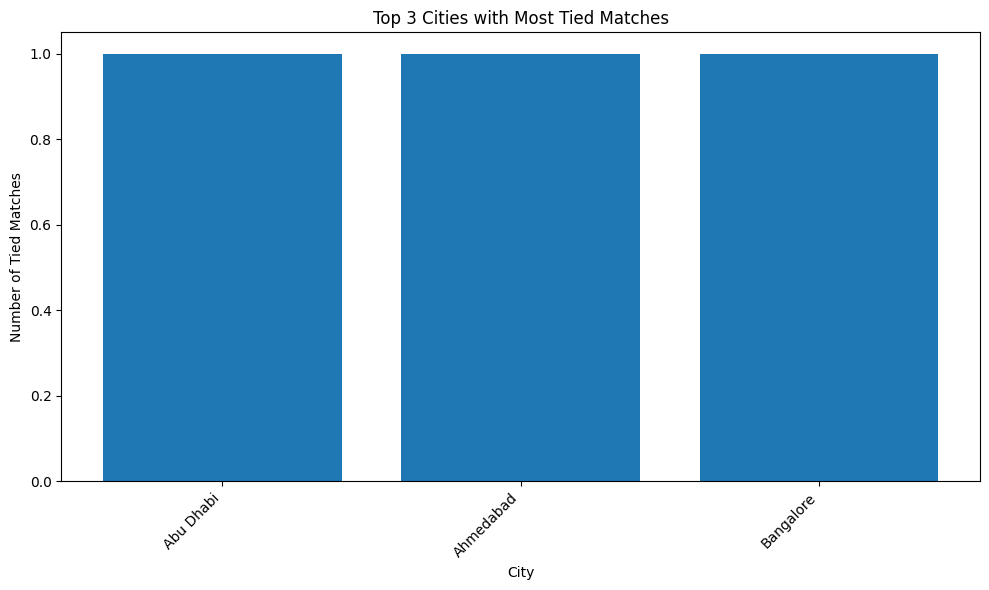

In [84]:
import matplotlib.pyplot as plt

tied_matches = matches[matches['result'] == 'tie']

city_tied_counts = tied_matches.groupby('city')['id'].count().reset_index()

city_tied_counts.rename(columns={'id': 'tied_count'}, inplace=True)

city_tied_counts = city_tied_counts.sort_values(by='tied_count', ascending=False)

top_3_cities = city_tied_counts.head(3)

plt.figure(figsize=(10, 6))
plt.bar(top_3_cities['city'], top_3_cities['tied_count'])
plt.xlabel("City")
plt.ylabel("Number of Tied Matches")
plt.title("Top 3 Cities with Most Tied Matches")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

○ Q5: Which season had the closest matches on average (smallest winning
margins)?


In [85]:
matches['winning_margin'] = matches.apply(lambda row: abs(row['win_by_runs'] - row['win_by_wickets']), axis=1)

avg_margin_by_season = matches.groupby('season')['winning_margin'].mean().reset_index()

closest_season = avg_margin_by_season.loc[avg_margin_by_season['winning_margin'].idxmin()]

print("Season with closest matches on average:", closest_season['season'])
print("Average winning margin:", closest_season['winning_margin'])

Season with closest matches on average: 2018.0
Average winning margin: 14.35


**Ball-Level Analysis (Using Deliveries.csv):**

2. Batsman and Bowler Insights:
● Q6: Identify the most consistent batsman across all seasons (highest average runs
per match).


In [86]:
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()

batsman_matches = deliveries.groupby('batsman')['match_id'].nunique().reset_index()

batsman_stats = pd.merge(batsman_runs, batsman_matches, on='batsman')

batsman_stats['avg_runs_per_match'] = batsman_stats['batsman_runs'] / batsman_stats['match_id']

batsman_stats = batsman_stats.sort_values(by='avg_runs_per_match', ascending=False)

most_consistent_batsman = batsman_stats.iloc[0]
print("Most consistent batsman:", most_consistent_batsman['batsman'])
print("Average runs per match:", most_consistent_batsman['avg_runs_per_match'])

Most consistent batsman: HM Amla
Average runs per match: 42.0


 Q7: Find the top 5 batsmen with the most boundaries (fours and sixes)

In [87]:
boundaries = deliveries[(deliveries['batsman_runs'] == 4) | (deliveries['batsman_runs'] == 6)]

boundary_counts = boundaries.groupby('batsman')['batsman_runs'].count().reset_index()

boundary_counts.rename(columns={'batsman_runs': 'boundary_count'}, inplace=True)

boundary_counts = boundary_counts.sort_values(by='boundary_count', ascending=False)

top_5_batsmen = boundary_counts.head(5)

print(top_5_batsmen)

       batsman  boundary_count
104  G Gambhir             357
276   SK Raina             343
67    CH Gayle             339
317   V Sehwag             304
241  RG Sharma             300


Q8: Analyze the strike rate of batsmen in the powerplay (overs 1-6) and death overs
(overs 16-20).

In [88]:
powerplay_overs = deliveries[deliveries['over'].between(1, 6)]
death_overs = deliveries[deliveries['over'].between(16, 20)]
powerplay_strike_rate = powerplay_overs.groupby('batsman')['batsman_runs'].sum() / powerplay_overs.groupby('batsman')['ball'].count() * 100
powerplay_strike_rate = powerplay_strike_rate.reset_index().rename(columns={0: 'strike_rate'})

death_overs_strike_rate = death_overs.groupby('batsman')['batsman_runs'].sum() / death_overs.groupby('batsman')['ball'].count() * 100
death_overs_strike_rate = death_overs_strike_rate.reset_index().rename(columns={0: 'strike_rate'})
print("Strike Rate in Powerplay Overs:")
print(powerplay_strike_rate)

print("\nStrike Rate in Death Overs:")
print(death_overs_strike_rate)

Strike Rate in Powerplay Overs:
             batsman  strike_rate
0           A Chopra    65.853659
1         A Flintoff    93.333333
2          A Symonds    83.720930
3        AA Bilakhia    69.696970
4    AA Jhunjhunwala    66.666667
..               ...          ...
212      YV Takawale    72.463768
213    Yashpal Singh    45.945946
214      Younis Khan    42.857143
215     Yuvraj Singh   106.603774
216           Z Khan     0.000000

[217 rows x 2 columns]

Strike Rate in Death Overs:
            batsman  strike_rate
0    A Ashish Reddy   121.052632
1        A Chandila     0.000000
2          A Chopra    50.000000
3       A Choudhary   125.000000
4        A Flintoff   138.888889
..              ...          ...
364       YS Chahal    54.166667
365     YV Takawale   223.076923
366   Yashpal Singh   130.769231
367    Yuvraj Singh   165.131579
368          Z Khan   105.617978

[369 rows x 2 columns]


Q9: Determine the most economical bowler (minimum runs per over bowled) who
has bowled at least 100 overs in total

In [89]:
balls_bowled = deliveries.groupby('bowler')['ball'].count().reset_index()

balls_bowled['overs_bowled'] = balls_bowled['ball'] / 6

filtered_bowlers = balls_bowled[balls_bowled['overs_bowled'] >= 100]
runs_conceded = deliveries.groupby('bowler')['total_runs'].sum().reset_index()

bowler_stats = pd.merge(filtered_bowlers, runs_conceded, on='bowler')
bowler_stats['economy_rate'] = bowler_stats['total_runs'] / bowler_stats['overs_bowled']

most_economical_bowler = bowler_stats.loc[bowler_stats['economy_rate'].idxmin()]
print("Most Economical Bowler:")
print(f"Bowler: {most_economical_bowler['bowler']}")
print(f"Economy Rate: {most_economical_bowler['economy_rate']:.2f}")

Most Economical Bowler:
Bowler: SP Narine
Economy Rate: 6.09


Q10: Which bowler has the highest dot-ball percentage?

In [90]:
total_balls = deliveries.groupby('bowler')['ball'].count().reset_index()

dot_balls = deliveries[deliveries['total_runs'] == 0].groupby('bowler')['ball'].count().reset_index()

bowler_stats = pd.merge(total_balls, dot_balls, on='bowler', how='left')
bowler_stats.rename(columns={'ball_x': 'total_balls', 'ball_y': 'dot_balls'}, inplace=True)
bowler_stats.fillna(0, inplace=True)
bowler_stats['dot_ball_percentage'] = (bowler_stats['dot_balls'] / bowler_stats['total_balls']) * 100

highest_dot_ball_bowler = bowler_stats.loc[bowler_stats['dot_ball_percentage'].idxmax()]
print("Bowler with Highest Dot Ball Percentage:")
print(f"Bowler: {highest_dot_ball_bowler['bowler']}")
print(f"Dot Ball Percentage: {highest_dot_ball_bowler['dot_ball_percentage']:.2f}%")

Bowler with Highest Dot Ball Percentage:
Bowler: LA Carseldine
Dot Ball Percentage: 57.14%


# 3. Match Dynamics:
Q11: Analyze run rate trends across different overs (powerplay, middle
overs, and death overs).
■ Hint: Group data by over and inning to calculate average run rates

In [91]:
powerplay_overs = deliveries[deliveries['over'].between(1, 6)]
middle_overs = deliveries[deliveries['over'].between(7, 15)]
death_overs = deliveries[deliveries['over'].between(16, 20)]
powerplay_run_rate = powerplay_overs.groupby(['inning'])['total_runs'].sum() / (powerplay_overs.groupby(['inning'])['ball'].count() / 6)
middle_overs_run_rate = middle_overs.groupby(['inning'])['total_runs'].sum() / (middle_overs.groupby(['inning'])['ball'].count() / 6)
death_overs_run_rate = death_overs.groupby(['inning'])['total_runs'].sum() / (death_overs.groupby(['inning'])['ball'].count() / 6)
print("Run Rate Trends:")
print("\nPowerplay Overs:")
print(powerplay_run_rate)
print("\nMiddle Overs:")
print(middle_overs_run_rate)
print("\nDeath Overs:")
print(death_overs_run_rate)

Run Rate Trends:

Powerplay Overs:
inning
1     7.071008
2     7.372592
3    13.750000
4    13.363636
dtype: float64

Middle Overs:
inning
1    7.263347
2    7.310073
dtype: float64

Death Overs:
inning
1    9.350419
2    8.722241
dtype: float64


○ Q12: Identify matches where teams successfully defended a low total
(<150 runs)

In [92]:
import pandas as pd

inning_runs = deliveries.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()
inning_runs = inning_runs.pivot(index='match_id', columns='inning', values='total_runs').reset_index()
inning_runs.columns = [col if col != 1 and col != 2 else f'inning{col}_score' for col in inning_runs.columns]

low_scoring_matches = inning_runs[inning_runs['inning1_score'] < 150]

low_scoring_matches_with_winner = pd.merge(low_scoring_matches, matches[['id', 'winner', 'team1']],
                                         left_on='match_id', right_on='id', how='left')

low_scoring_defended_matches = low_scoring_matches_with_winner[
    (low_scoring_matches_with_winner['team1'] == low_scoring_matches_with_winner['winner'])
]

print("Matches where teams successfully defended a low total (<150 runs):")
for index, row in low_scoring_defended_matches.iterrows():
    print(f"Match ID: {row['match_id']}, Team: {row['team1']}, Score: {int(row['inning1_score'])}")

Matches where teams successfully defended a low total (<150 runs):
Match ID: 24, Team: Mumbai Indians, Score: 142
Match ID: 27, Team: Kolkata Knight Riders, Score: 131
Match ID: 42, Team: Kings XI Punjab, Score: 138
Match ID: 43, Team: Rising Pune Supergiant, Score: 148
Match ID: 59, Team: Mumbai Indians, Score: 129
Match ID: 88, Team: Kolkata Knight Riders, Score: 129
Match ID: 95, Team: Kolkata Knight Riders, Score: 133
Match ID: 107, Team: Royal Challengers Bangalore, Score: 126
Match ID: 119, Team: Royal Challengers Bangalore, Score: 133
Match ID: 130, Team: Kings XI Punjab, Score: 139
Match ID: 135, Team: Kings XI Punjab, Score: 119
Match ID: 138, Team: Mumbai Indians, Score: 148
Match ID: 139, Team: Royal Challengers Bangalore, Score: 145
Match ID: 147, Team: Deccan Chargers, Score: 145
Match ID: 160, Team: Rajasthan Royals, Score: 145
Match ID: 164, Team: Kings XI Punjab, Score: 134
Match ID: 169, Team: Chennai Super Kings, Score: 116
Match ID: 174, Team: Deccan Chargers, Score:

# 4. Wickets and Dismissals:
○ Q13: Find the most common mode of dismissal in IPL history.

In [93]:
dismissals = deliveries.dropna(subset=['player_dismissed'])
dismissals = dismissals[dismissals['player_dismissed'] != 'Not Out']

dismissal_counts = dismissals.groupby('dismissal_kind')['player_dismissed'].count().reset_index()

most_common_dismissal = dismissal_counts.loc[dismissal_counts['player_dismissed'].idxmax()]

print("Most Common Mode of Dismissal in IPL History:")
print(f"Dismissal Type: {most_common_dismissal['dismissal_kind']}")
print(f"Count: {most_common_dismissal['player_dismissed']}")

Most Common Mode of Dismissal in IPL History:
Dismissal Type: caught
Count: 2696


Q14: Which bowler has dismissed the most number of a specific batsman
(head-to-head matchup)?
■ Hint: Use player_dismissed and bowler columns.

In [94]:
dismissals = deliveries[deliveries['player_dismissed'] != 'Not Out']
dismissals = dismissals.dropna(subset=['player_dismissed'])

dismissal_counts = dismissals.groupby(['player_dismissed', 'bowler'])['player_dismissed'].count().reset_index(name='dismissal_count')

max_dismissals = dismissal_counts.loc[dismissal_counts.groupby('player_dismissed')['dismissal_count'].idxmax()]

print("Bowler with Most Dismissals of a Specific Batsman (Head-to-Head):")
for index, row in max_dismissals.iterrows():
    print(f"Batsman: {row['player_dismissed']}, Bowler: {row['bowler']}, Dismissals: {row['dismissal_count']}")

Bowler with Most Dismissals of a Specific Batsman (Head-to-Head):
Batsman: A Ashish Reddy, Bowler: R Vinay Kumar, Dismissals: 2
Batsman: A Chopra, Bowler: DW Steyn, Dismissals: 1
Batsman: A Choudhary, Bowler: MM Sharma, Dismissals: 1
Batsman: A Flintoff, Bowler: A Nehra, Dismissals: 1
Batsman: A Kumble, Bowler: IK Pathan, Dismissals: 1
Batsman: A Mishra, Bowler: SL Malinga, Dismissals: 2
Batsman: A Mithun, Bowler: A Mishra, Dismissals: 1
Batsman: A Mukund, Bowler: Sohail Tanvir, Dismissals: 1
Batsman: A Nehra, Bowler: IK Pathan, Dismissals: 1
Batsman: A Nel, Bowler: VY Mahesh, Dismissals: 1
Batsman: A Singh, Bowler: A Mishra, Dismissals: 1
Batsman: A Symonds, Bowler: A Mishra, Dismissals: 3
Batsman: A Uniyal, Bowler: SL Malinga, Dismissals: 1
Batsman: A Zampa, Bowler: A Mishra, Dismissals: 1
Batsman: AA Bilakhia, Bowler: A Mishra, Dismissals: 1
Batsman: AA Chavan, Bowler: BJ Hodge, Dismissals: 1
Batsman: AA Jhunjhunwala, Bowler: DE Bollinger, Dismissals: 1
Batsman: AA Noffke, Bowler: S

○ Q15: Plot a heatmap of dismissals by over and inning to identify in which
phase most wickets fall.


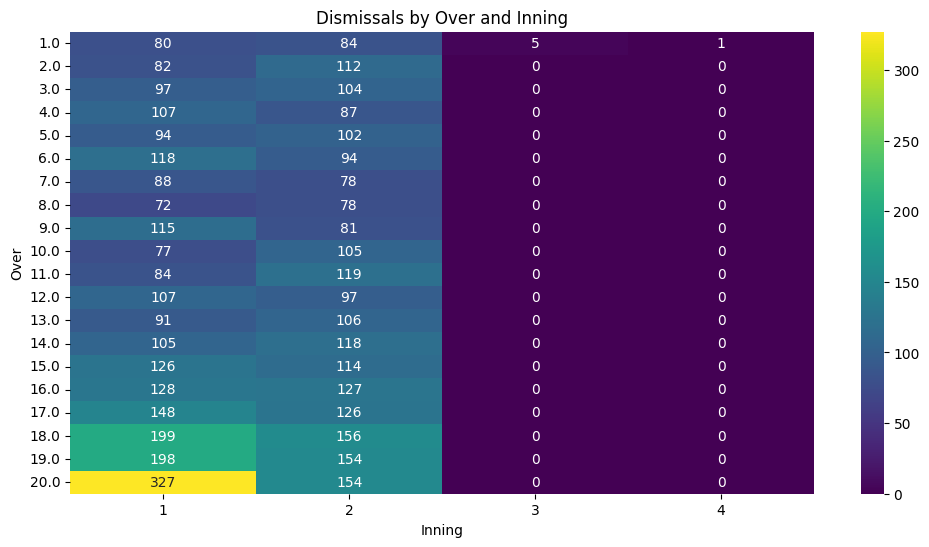

In [95]:
!pip install seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dismissals = deliveries.dropna(subset=['player_dismissed'])
dismissals = dismissals[dismissals['player_dismissed'] != 'Not Out']

dismissals_by_over_inning = dismissals.groupby(['over', 'inning'])['player_dismissed'].count().reset_index(name='dismissal_count')

dismissal_matrix = dismissals_by_over_inning.pivot(index='over', columns='inning', values='dismissal_count').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(dismissal_matrix, annot=True, cmap='viridis', fmt='g')
plt.title('Dismissals by Over and Inning')
plt.xlabel('Inning')
plt.ylabel('Over')
plt.show()

# Visualization Requirements:
**1. Team Insights:**
○ Plot win percentages of all teams using a horizontal bar chart

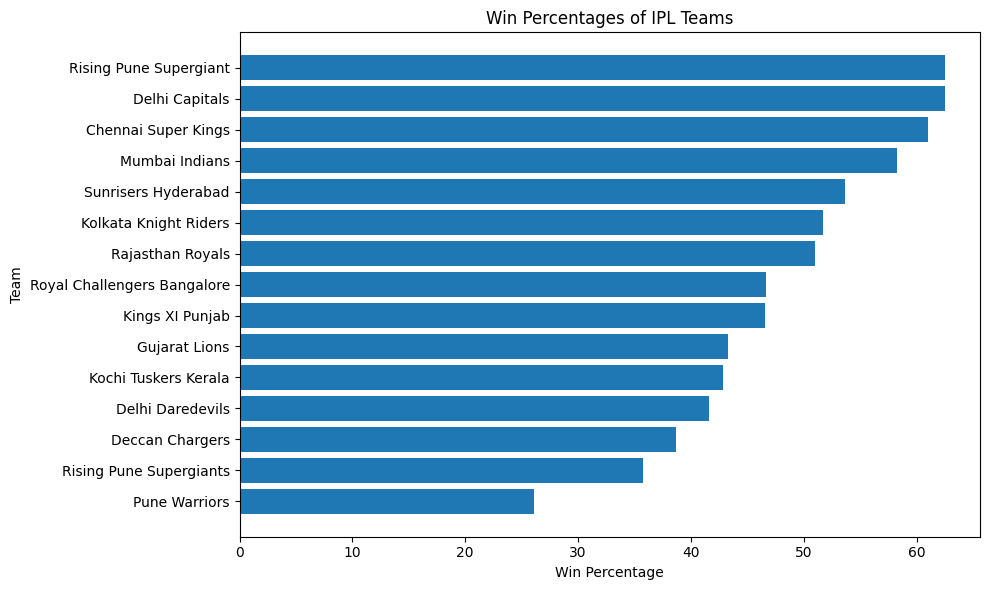

In [96]:
total_matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()

total_matches_won = matches['winner'].value_counts()

win_percentage = (total_matches_won / total_matches_played) * 100

win_percentage = win_percentage.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(win_percentage.index, win_percentage.values)
plt.xlabel("Win Percentage")
plt.ylabel("Team")
plt.title("Win Percentages of IPL Teams")
plt.tight_layout()
plt.show()

○ Compare winning margins (runs and wickets) for the top 5 teams using a
stacked bar chart.


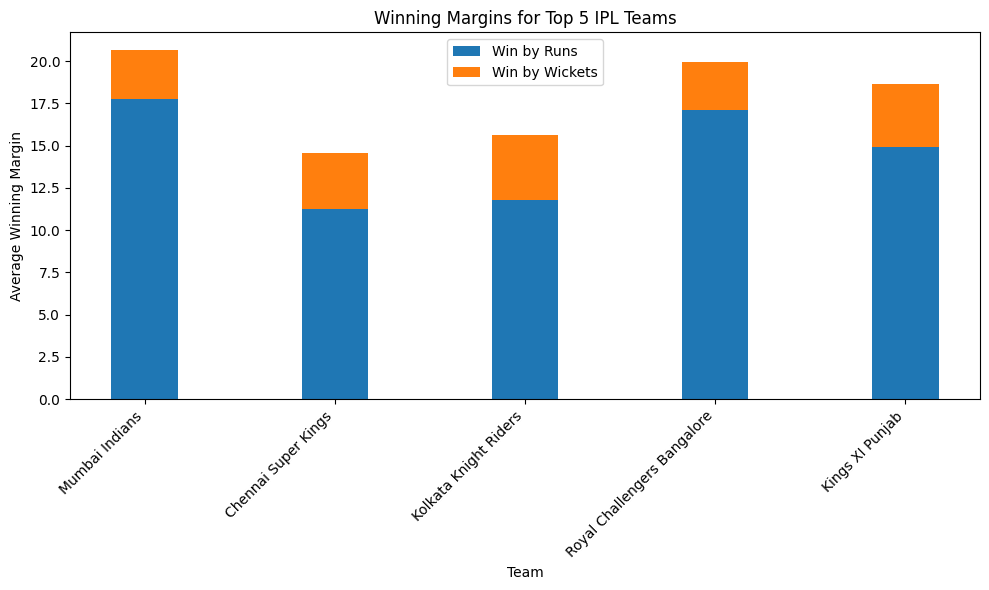

In [97]:
import numpy as np
top_5_teams = matches['winner'].value_counts().head(5).index

filtered_matches = matches[matches['winner'].isin(top_5_teams)]

winning_margins = filtered_matches.groupby('winner').agg(
    avg_win_by_runs=('win_by_runs', 'mean'),
    avg_win_by_wickets=('win_by_wickets', 'mean')
).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions = np.arange(len(top_5_teams))

ax.bar(bar_positions, winning_margins['avg_win_by_runs'], bar_width, label='Win by Runs')
ax.bar(bar_positions, winning_margins['avg_win_by_wickets'], bar_width,
       bottom=winning_margins['avg_win_by_runs'], label='Win by Wickets')

ax.set_xlabel("Team")
ax.set_ylabel("Average Winning Margin")
ax.set_title("Winning Margins for Top 5 IPL Teams")
ax.set_xticks(bar_positions)
ax.set_xticklabels(top_5_teams, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

**2. Basman and Bowler Performance:**
○ Visualize the top 10 batsmen based on runs, strike rate, and boundaries.

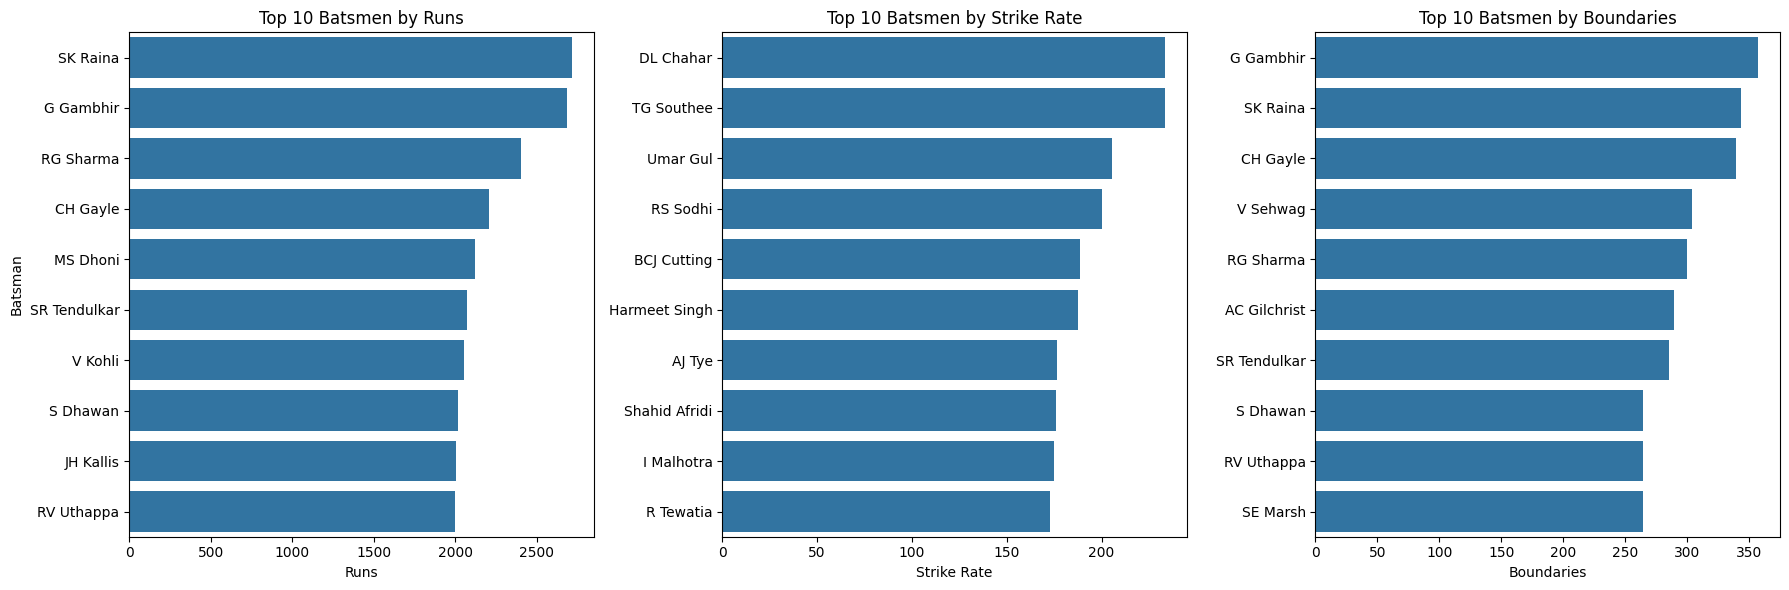

In [98]:
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
top_10_runs = batsman_runs.sort_values(by='batsman_runs', ascending=False).head(10)

batsman_balls_faced = deliveries.groupby('batsman')['ball'].count().reset_index()
batsman_strike_rate = pd.merge(batsman_runs, batsman_balls_faced, on='batsman')
batsman_strike_rate['strike_rate'] = (batsman_strike_rate['batsman_runs'] / batsman_strike_rate['ball']) * 100
top_10_strike_rate = batsman_strike_rate.sort_values(by='strike_rate', ascending=False).head(10)

boundaries = deliveries[deliveries['batsman_runs'].isin([4, 6])]
batsman_boundaries = boundaries.groupby('batsman')['batsman_runs'].count().reset_index(name='boundaries')
top_10_boundaries = batsman_boundaries.sort_values(by='boundaries', ascending=False).head(10)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='batsman_runs', y='batsman', data=top_10_runs, ax=axes[0])
axes[0].set_title('Top 10 Batsmen by Runs')
axes[0].set_xlabel('Runs')
axes[0].set_ylabel('Batsman')

sns.barplot(x='strike_rate', y='batsman', data=top_10_strike_rate, ax=axes[1])
axes[1].set_title('Top 10 Batsmen by Strike Rate')
axes[1].set_xlabel('Strike Rate')
axes[1].set_ylabel('')
sns.barplot(x='boundaries', y='batsman', data=top_10_boundaries, ax=axes[2])
axes[2].set_title('Top 10 Batsmen by Boundaries')
axes[2].set_xlabel('Boundaries')
axes[2].set_ylabel('')
plt.tight_layout()
plt.show()

○ Plot a scatter plot comparing economy rates and dot-ball percentages for top
10 bowlers.


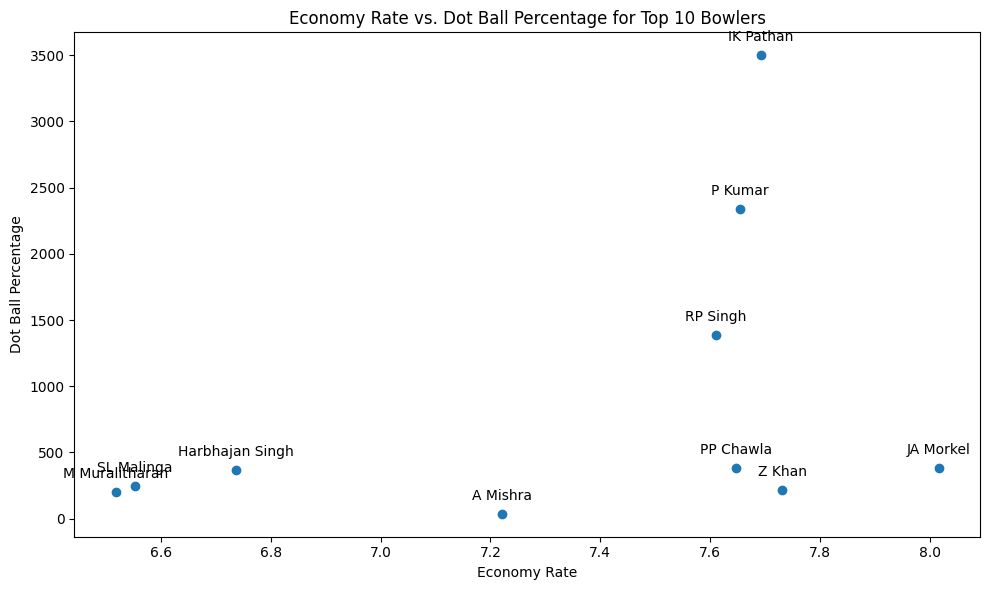

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

bowler_runs_conceded = deliveries.groupby('bowler')['total_runs'].sum().reset_index()

bowler_balls_bowled = deliveries.groupby('bowler')['ball'].count().reset_index()

bowler_overs_bowled = bowler_balls_bowled['ball'] / 6

bowler_economy_rate = bowler_runs_conceded['total_runs'] / bowler_overs_bowled
bowler_economy_rate_df = pd.DataFrame({'bowler': bowler_runs_conceded['bowler'], 'economy_rate': bowler_economy_rate})

dot_balls = deliveries[deliveries['total_runs'] == 0]
bowler_dot_balls = dot_balls.groupby('bowler')['ball'].count().reset_index(name='dot_balls')

bowler_dot_ball_percentage = (bowler_dot_balls['dot_balls'] / bowler_balls_bowled['ball']) * 100
bowler_dot_ball_percentage_df = pd.DataFrame({'bowler': bowler_dot_balls['bowler'], 'dot_ball_percentage': bowler_dot_ball_percentage})

bowler_stats = pd.merge(bowler_economy_rate_df, bowler_dot_ball_percentage_df, on='bowler')

top_10_bowlers = bowler_balls_bowled.sort_values(by='ball', ascending=False).head(10)['bowler'].tolist()
bowler_stats = bowler_stats[bowler_stats['bowler'].isin(top_10_bowlers)]

plt.figure(figsize=(10, 6))
plt.scatter(bowler_stats['economy_rate'], bowler_stats['dot_ball_percentage'])
plt.xlabel("Economy Rate")
plt.ylabel("Dot Ball Percentage")
plt.title("Economy Rate vs. Dot Ball Percentage for Top 10 Bowlers")

for i, row in bowler_stats.iterrows():
    plt.annotate(row['bowler'], (row['economy_rate'], row['dot_ball_percentage']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

**3. Match Trends:**
○ Show run rate trends per over (1-20) for a specific high-scoring match using
a line plot.


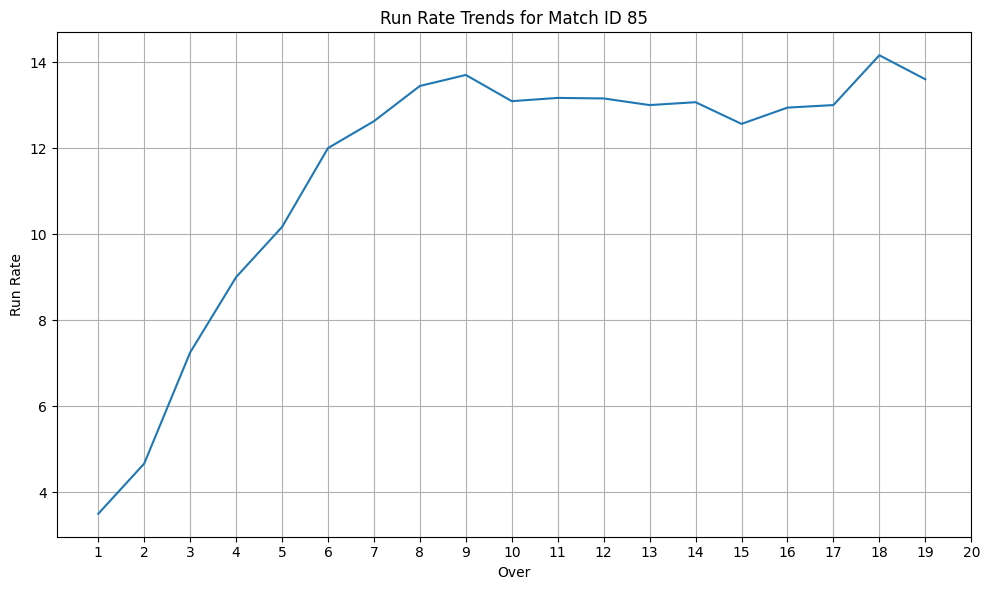

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

high_scoring_match_id = 85

match_deliveries = deliveries[deliveries['match_id'] == high_scoring_match_id]

runs_per_over = match_deliveries.groupby('over')['total_runs'].sum().cumsum()

run_rate_per_over = runs_per_over / pd.Series(range(1, len(runs_per_over) + 1))

plt.figure(figsize=(10, 6))
plt.plot(run_rate_per_over.index, run_rate_per_over.values)
plt.xlabel("Over")
plt.ylabel("Run Rate")
plt.title(f"Run Rate Trends for Match ID {high_scoring_match_id}")
plt.xticks(range(1, 21))
plt.grid(True)
plt.tight_layout()
plt.show()

○ Create a heatmap of run distribution across overs and innings

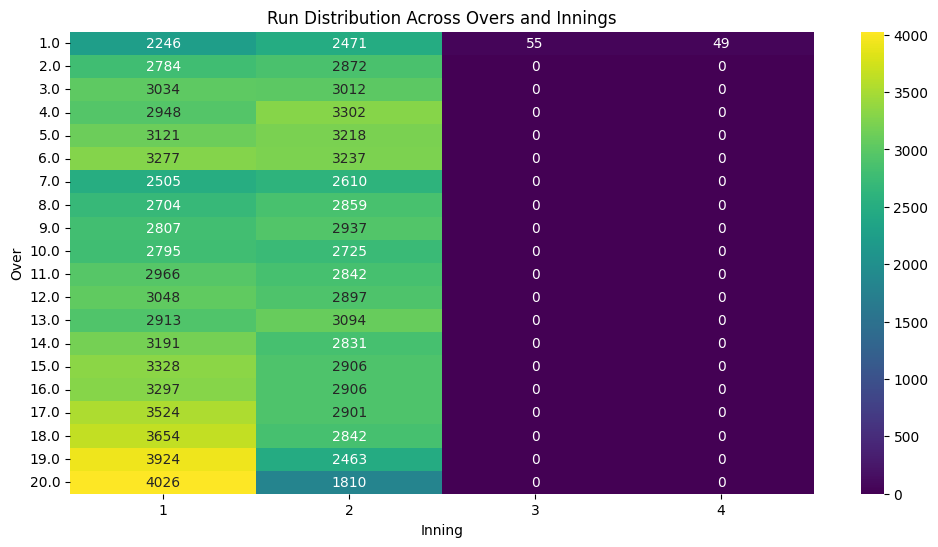

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

runs_per_over_inning = deliveries.groupby(['over', 'inning'])['total_runs'].sum().reset_index()

run_matrix = runs_per_over_inning.pivot(index='over', columns='inning', values='total_runs').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(run_matrix, annot=True, cmap='viridis', fmt='g')
plt.title('Run Distribution Across Overs and Innings')
plt.xlabel('Inning')
plt.ylabel('Over')
plt.show()

**4. Dismissals:**
○ Visualize the modes of dismissal using a pie chart.


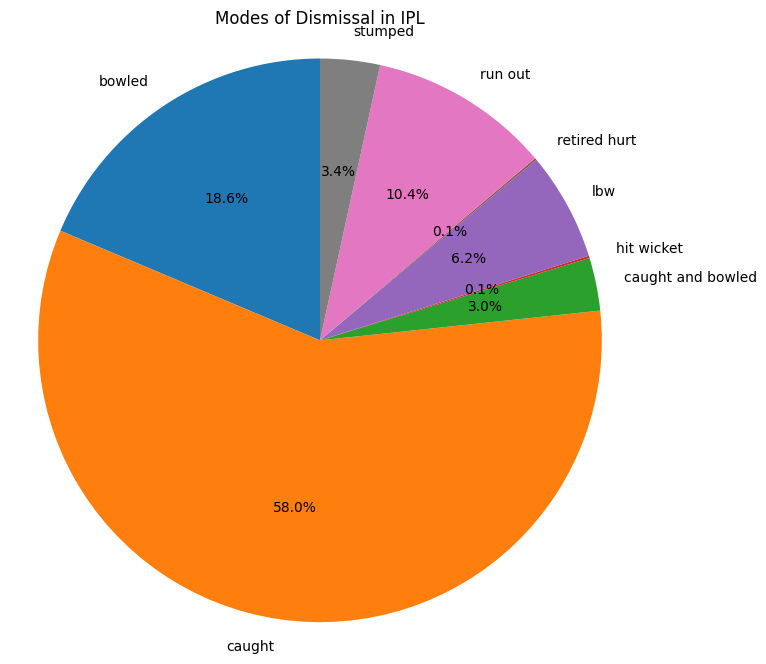

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

dismissals = deliveries.dropna(subset=['player_dismissed'])
dismissals = dismissals[dismissals['player_dismissed'] != 'Not Out']

dismissal_counts = dismissals.groupby('dismissal_kind')['player_dismissed'].count().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_counts['player_dismissed'], labels=dismissal_counts['dismissal_kind'], autopct='%1.1f%%', startangle=90)
plt.title('Modes of Dismissal in IPL')
plt.axis('equal')
plt.show()

○ Use a seaborn heatmap for wickets per over and inning.

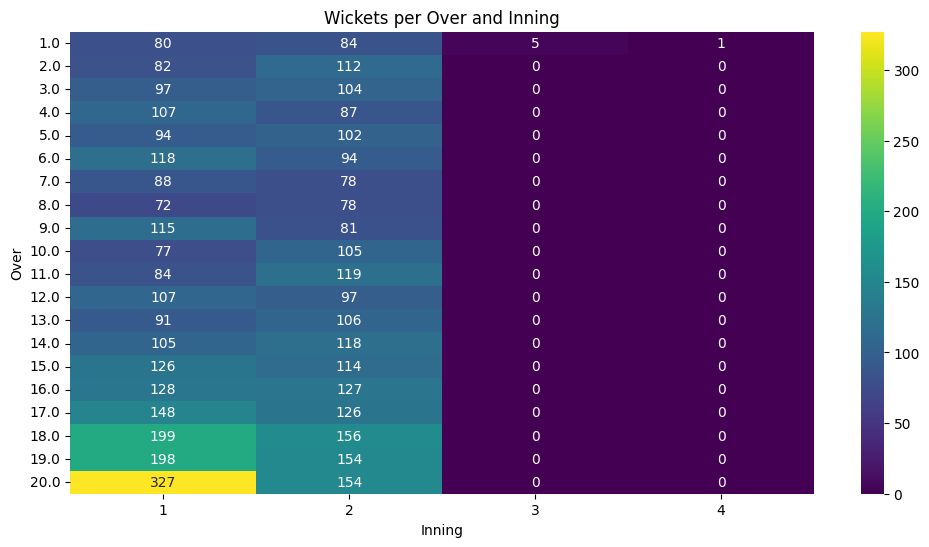

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dismissals = deliveries.dropna(subset=['player_dismissed'])
dismissals = dismissals[dismissals['player_dismissed'] != 'Not Out']

wickets_per_over_inning = dismissals.groupby(['over', 'inning'])['player_dismissed'].count().reset_index(name='wickets')

wicket_matrix = wickets_per_over_inning.pivot(index='over', columns='inning', values='wickets').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(wicket_matrix, annot=True, cmap='viridis', fmt='g')
plt.title('Wickets per Over and Inning')
plt.xlabel('Inning')
plt.ylabel('Over')
plt.show()

# Advanced Analysis (Bonus):
**1. Head-to-Head Team Analysis:**
○ Compare two teams' performance (like CSK vs. MI) based on:
■ Total wins.
■ Average scores.
■ Win margins.


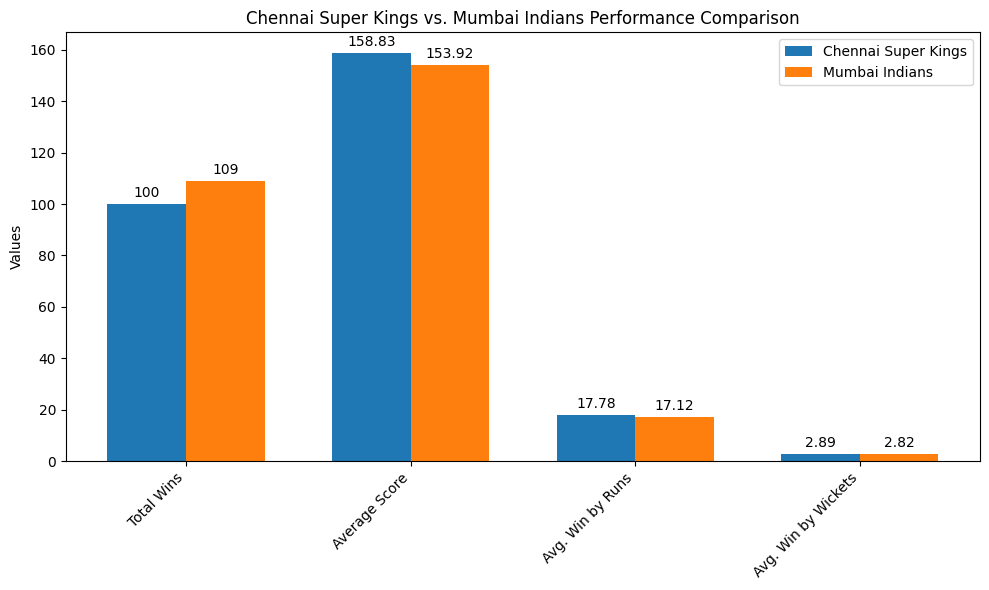

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

team1 = 'Chennai Super Kings'
team2 = 'Mumbai Indians'

team1_matches = matches[(matches['team1'] == team1) | (matches['team2'] == team1)]
team2_matches = matches[(matches['team1'] == team2) | (matches['team2'] == team2)]

team1_wins = team1_matches[team1_matches['winner'] == team1]['winner'].count()
team2_wins = team2_matches[team2_matches['winner'] == team2]['winner'].count()

team1_scores = deliveries[deliveries['batting_team'] == team1].groupby('match_id')['total_runs'].sum().mean()
team2_scores = deliveries[deliveries['batting_team'] == team2].groupby('match_id')['total_runs'].sum().mean()

team1_win_by_runs_avg = team1_matches[team1_matches['winner'] == team1]['win_by_runs'].mean()
team2_win_by_runs_avg = team2_matches[team2_matches['winner'] == team2]['win_by_runs'].mean()

team1_win_by_wickets_avg = team1_matches[team1_matches['winner'] == team1]['win_by_wickets'].mean()
team2_win_by_wickets_avg = team2_matches[team2_matches['winner'] == team2]['win_by_wickets'].mean()

labels = ['Total Wins', 'Average Score', 'Avg. Win by Runs', 'Avg. Win by Wickets']
team1_values = [team1_wins, team1_scores, team1_win_by_runs_avg, team1_win_by_wickets_avg]
team2_values = [team2_wins, team2_scores, team2_win_by_runs_avg, team2_win_by_wickets_avg]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, team1_values, width, label=team1)
rects2 = ax.bar(x + width/2, team2_values, width, label=team2)

ax.set_ylabel('Values')
ax.set_title(f'{team1} vs. {team2} Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height) if height.is_integer() else round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

**2. Impact Players:**
pact Players:
○ Identify the players who contributed the most to their team’s victories based
on:
■ Highest individual scores.
■ Wickets in low-scoring matches

In [105]:
import pandas as pd

merged_data = pd.merge(deliveries, matches[['id', 'winner']], left_on='match_id', right_on='id', how='inner')

highest_scores = merged_data[merged_data['batting_team'] == merged_data['winner']].groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index()
highest_scores = highest_scores.loc[highest_scores.groupby('match_id')['batsman_runs'].idxmax()]

highest_scores = highest_scores.sort_values(by='batsman_runs', ascending=False)

print("\nImpact Players - Highest Individual Scores in Winning Matches:")
print(highest_scores[['batsman', 'batsman_runs', 'match_id']].head(10))


low_scoring_threshold = 150

low_scoring_wins = merged_data[
    (merged_data['total_runs'] < low_scoring_threshold) & (merged_data['bowling_team'] == merged_data['winner'])
]


wickets_low_scoring = low_scoring_wins.groupby('bowler')['player_dismissed'].count().reset_index(name='wickets')

wickets_low_scoring = wickets_low_scoring.sort_values(by='wickets', ascending=False)

print("\nImpact Players - Wickets in Low-Scoring Winning Matches:")
print(wickets_low_scoring.head(10))


Impact Players - Highest Individual Scores in Winning Matches:
            batsman  batsman_runs  match_id
380     BB McCullum         158.0        60
2317       CH Gayle         128.0       372
1315        M Vijay         127.0       206
223       DA Warner         126.0        36
1528    PC Valthaty         120.0       243
1745       V Sehwag         119.0       279
386      MEK Hussey         116.0        61
603        SE Marsh         115.0        97
600   ST Jayasuriya         114.0        96
1085      MK Pandey         114.0       171

Impact Players - Wickets in Low-Scoring Winning Matches:
              bowler  wickets
221       SL Malinga       78
148         MM Patel       57
173        PP Chawla       55
219       SK Trivedi       54
183    R Vinay Kumar       53
95   Harbhajan Singh       53
4           A Mishra       53
268           Z Khan       50
98         IK Pathan       48
165          P Kumar       48


**3. Win Prediction Analysis:**
○ Analyze trends in toss decisions and their impact on match results.
■ Does choosing fielding first increase winning probability?


In [106]:
import pandas as pd

total_matches = len(matches)
field_first_matches = matches[matches['toss_decision'] == 'field']['id'].count()

field_first_wins = matches[(matches['toss_decision'] == 'field') & (matches['toss_winner'] == matches['winner'])]['id'].count()

win_prob_field_first = (field_first_wins / field_first_matches) * 100

print(f"Total Matches: {total_matches}")
print(f"Matches where toss winner chose to field: {field_first_matches}")
print(f"Matches where team fielding first won: {field_first_wins}")
print(f"Probability of winning when fielding first: {win_prob_field_first:.2f}%")

overall_win_prob = (matches['toss_winner'] == matches['winner']).mean() * 100
print(f"Overall probability of toss winner winning: {overall_win_prob:.2f}%")

if win_prob_field_first > overall_win_prob:
    print("Choosing to field first appears to increase the winning probability.")
else:
    print("Choosing to field first does not appear to significantly increase the winning probability.")

Total Matches: 756
Matches where toss winner chose to field: 463
Matches where team fielding first won: 259
Probability of winning when fielding first: 55.94%
Overall probability of toss winner winning: 51.98%
Choosing to field first appears to increase the winning probability.



KPIs for IPL Data Analysis Project Evaluation
1. Data Preparation
KPI: Proper handling of missing data and clean merging of datasets.

Measurement:

Missing Data:
Percentage of missing values before and after handling: Calculate the percentage of missing values in each column before and after applying missing data handling techniques (e.g., imputation, removal). A lower percentage after handling indicates better performance.
Visual inspection: Examine the data after handling for any remaining missing values or unexpected patterns.
Data Merging:
Check for data integrity: Verify the merged dataset for consistency and accuracy by comparing it with the original datasets. Ensure the merged dataset has the expected number of rows and columns.
Check for duplicates: Identify and handle any duplicate rows that might have been introduced during the merge.
2. Logical Analysis
KPI: Accurate answers to all 15+ questions and correct implementation of advanced groupings and aggregations.

Measurement:

Accuracy:
Manual verification: Cross-check the answers obtained with external sources or domain expertise to ensure their accuracy.
Peer review: Have another data analyst review the analysis and findings to identify potential errors or inconsistencies.
Groupings and Aggregations:
Code review: Examine the code used for groupings and aggregations to ensure it aligns with the intended logic and produces the desired results.
Data validation: Compare the aggregated results with the original data to verify their correctness.
3. Code Quality
KPI: Use of vectorized operations and optimized queries, clear, well-documented, and modular code.

Measurement:

Vectorization:
Code review: Check for the use of vectorized operations (e.g., NumPy functions) instead of loops for data manipulation. Vectorized operations are generally more efficient.
Performance profiling: Use tools like timeit to measure the execution time of critical code sections and identify areas for optimization.
Optimized Queries:
Query complexity: Evaluate the complexity of data queries and identify potential bottlenecks.
Query execution time: Measure the time taken to execute queries and identify areas for improvement.
Code Structure:
Readability: Assess the code's readability by checking for consistent formatting, meaningful variable names, and clear comments.
Modularity: Evaluate the code's organization into functions or modules to promote reusability and maintainability.
Documentation: Check for comprehensive documentation explaining the code's purpose, logic, and usage.
4. Visualizations
KPI: Use of appropriate chart types with labeled axes, legends, and titles.

Measurement:

Chart type selection: Assess whether the chart type chosen is appropriate for the data being visualized and effectively conveys the intended message.
Labeling: Check for clear and concise labels on axes, legends, and titles to ensure the visualization is easy to understand.
Aesthetics: Evaluate the visual appeal of the charts, including color choices, font sizes, and overall layout.
5. Insights and Interpretation
KPI: Unique observations and actionable insights from the data.

Measurement:

Novelty: Assess whether the insights generated are new and provide a different perspective on the data.
Actionability: Evaluate whether the insights can be translated into practical actions or recommendations for stakeholders.
Relevance: Ensure the insights are relevant to the business context and address the key questions or objectives of the analysis.


